<a href="https://colab.research.google.com/github/sanjaay-manikandan/Ideal-Sampling/blob/main/Exp1_Natural_Sampling_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

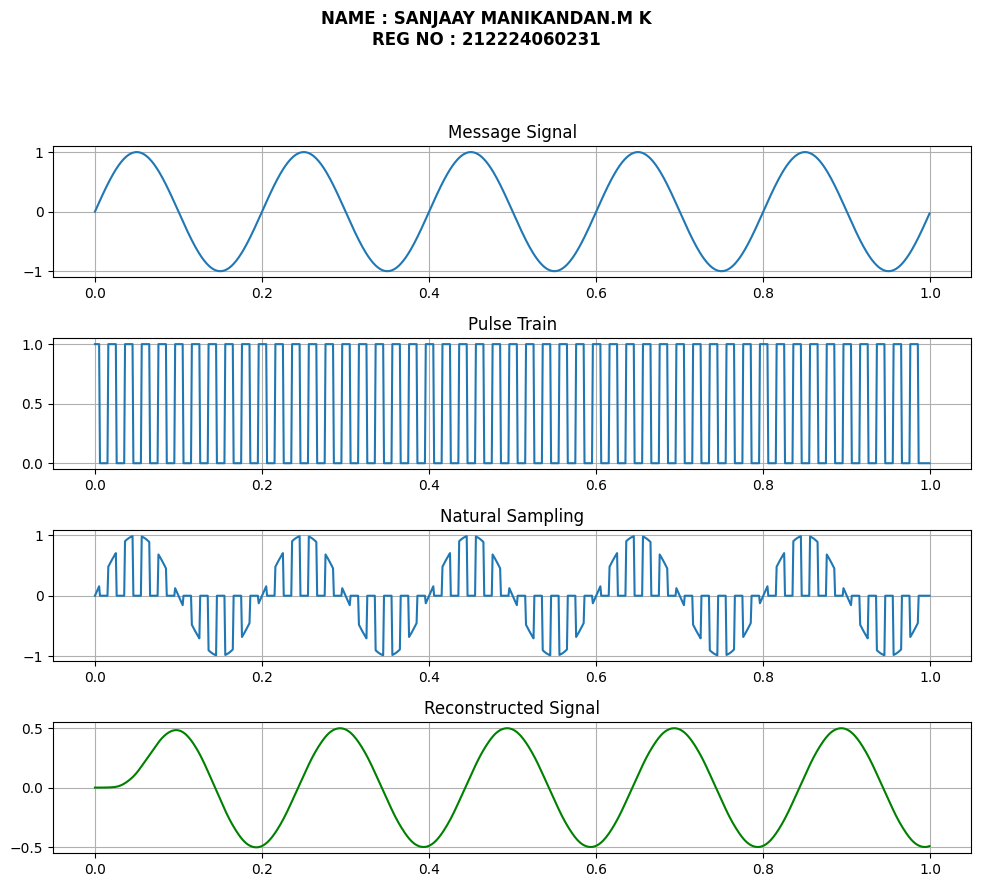

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parameters
fs, T, fm, fp = 1000, 1, 5, 50
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Pulse train
pw = fs // (2*fp)
p = np.zeros_like(t)
p[::fs//fp] = 1
p = np.convolve(p, np.ones(pw), mode='same')

# Natural sampling
nat = m * p

# Reconstruction (LPF)
b, a = butter(4, 10/(0.5*fs), 'low')
rec = lfilter(b, a, nat)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : SANJAAY MANIKANDAN.M K\nREG NO : 212224060231",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, m)
plt.title("Message Signal")
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t, p)
plt.title("Pulse Train")
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(t, nat)
plt.title("Natural Sampling")
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(t, rec, color='g')
plt.title("Reconstructed Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()